In [ ]:
# Fake News Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\data.csv\data.csv")
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [4]:
data.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
data.isnull().sum().sum()

21

In [6]:
## Get the Independent Features
X=data.drop('Label',axis=1)

In [7]:
y=data['Label']

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [9]:
data.shape

(4009, 4)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [11]:
data=data.dropna()

In [12]:
data.shape

(3988, 4)

In [13]:
messages=data.copy()

In [14]:
messages.reset_index(inplace=True)## reseting the index after eliminating nan values


In [15]:
messages['Body'][6]

"In 2012, Kansas lawmakers, led by Gov. Sam Brownback, a Republican, enacted a tax cut that eliminated state income taxes entirely for pass-through entities — such as sole proprietorships and limited liability partnerships — which are taxed at the owner’s individual income tax rate. The law also lowered individual income tax rates, cutting the top rate to 4.9 percent from 6.4 percent.\nThe tax package reduced state revenue by nearly $700 million a year, a drop of about 8 percent, from 2013 through 2016, according to the Kansas Legislative Research Department, forcing officials to shorten school calendars, delay highway repairs and reduce aid to the poor. Research suggests the package did not stimulate the economy, certainly not enough to pay for the tax cut. This year, legislators passed a bill to largely rescind the law, saying it had not worked as intended.\n“It caused a lot of budget instability,” said State Senator Jim Denning, a Republican who led the effort to repeal the pass-thr

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Body'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus[3]

'mexico citi reuter egypt cheiron hold limit right partner mexican nation oil compani pemex onshor cardena mora project industri regul said wednesday tie mark second joint ventur pemex equiti partner sinc energi open final end compani decad long monopoli allow develop project privat foreign oil compani cardena mora squar mile sq km field locat tabasco state believ contain million barrel oil equival boe proven probabl possibl reserv'

In [18]:
## Applying TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [19]:
y=messages['Label']

In [20]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [21]:
tfidf_v.get_feature_names()[:20]

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'aaron judg',
 'aaron kesel',
 'aaron rodger',
 'ab',
 'abandon',
 'abc',
 'abe',
 'aberti',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'abus',
 'ac',
 'academ',
 'academi',
 'acc']

In [22]:
tfidf_v.get_params()# things what you have applied in tfidf

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [23]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [24]:
count_df.head()

,aaron,aaron judg,aaron kesel,aaron rodger,ab,abandon,abc,abe,aberti,abil,...,yorker,young,younger,youth,youtub,zach,zapatista,zealand,zero,zone
0,0.073735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import matplotlib.pyplot as plt

In [26]:
# Applying confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [28]:
from sklearn import metrics
import numpy as np
import itertools


accuracy:   0.893
Confusion matrix, without normalization


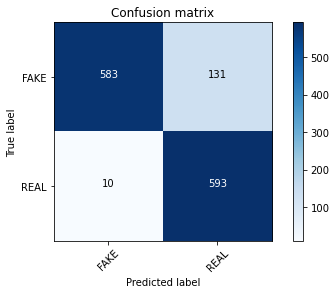

In [29]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [30]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8929384965831435

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.986
Confusion matrix, without normalization


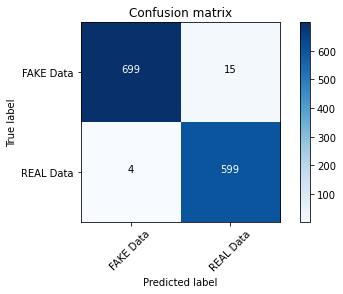

In [32]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])
